In [5]:
import os
import pm4py
from event_log_generator.event_reader import get_db_connection, generate_eventlog


In [7]:
from dotenv import load_dotenv
load_dotenv()

True

In [9]:

mysql_user = os.environ.get('MYSQL_USER')
mysql_password = os.environ.get('MYSQL_PASSWORD')
mysql_host = os.environ.get('MYSQL_HOST')
mysql_db = os.environ.get('MYSQL_DB')
mysql_port = os.environ.get('MYSQL_PORT')

db_connection = get_db_connection(
    mysql_host, mysql_port, mysql_user, mysql_password, mysql_db)
resource_ids = [os.environ.get('JUPYTER_RESOURCE_ID')]
event_log = generate_eventlog(db_connection, resource_ids=[
                              '28d2024790065ba320fd009ac8c575864e7670e5e4adee594ad4cb379e8652c3f43377808939bb10dc9a1e2e4e0f9a366ed403c60322d00cd2a52ccfe70327d5'])
event_log.head()

Reading events from database from None until None


,EVENT_TYPE,REMARKS,RESOURCE,RESOURCE_TYPE,case:concept:name,concept:name,in-service-context,intent,lifecycle:transition,serviceEndpoint,stateLabel,time:timestamp,user
0,USER_MESSAGE,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,7dab93e6-5237-4d83-9a11-552059b796ad,requestMenu,False,requestMenu,complete,,requestMenu,2023-11-01 16:32:34,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...
2,SERVICE_REQUEST,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,7dab93e6-5237-4d83-9a11-552059b796ad,getMenu,False,NaN,complete,https://mobsos.tech4comp.dbis.rwth-aachen.de/m...,NaN,2023-11-01 16:32:37,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...
3,USER_MESSAGE,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,7dab93e6-5237-4d83-9a11-552059b796ad,requestMenu,True,requestMenu,complete,,requestMenu,2023-11-01 16:32:44,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...
5,SERVICE_REQUEST,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,7dab93e6-5237-4d83-9a11-552059b796ad,getMenu,False,NaN,complete,https://mobsos.tech4comp.dbis.rwth-aachen.de/m...,NaN,2023-11-01 16:32:45,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...
6,USER_MESSAGE,"{""user"": ""155afb0b06460d7c3bb33b23f91f71e1cc86...",28d2024790065ba320fd009ac8c575864e7670e5e4adee...,bot,3806b4bd-2627-46fd-81ad-06811d5f59da,requestMenu,False,requestMenu,complete,,requestMenu,2023-11-01 16:33:04,155afb0b06460d7c3bb33b23f91f71e1cc865bbe043051...


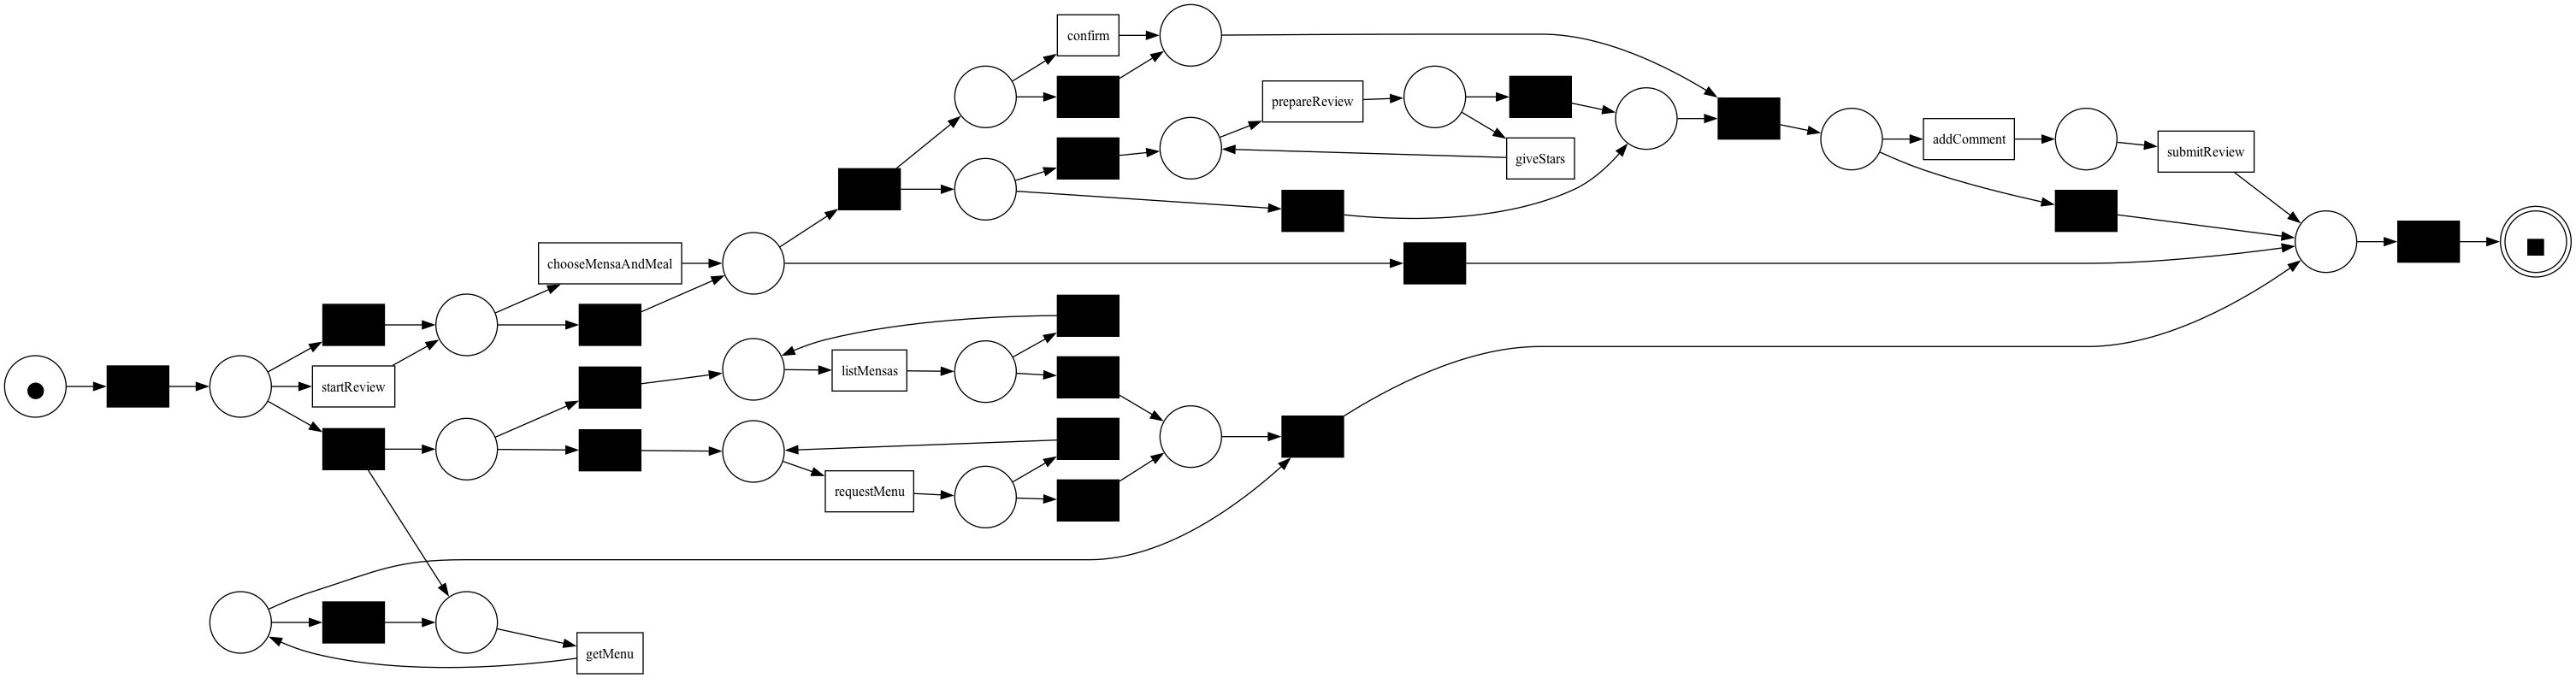

In [10]:

net, im, fm = pm4py.discover_petri_net_inductive(event_log)
net = pm4py.reduce_petri_net_invisibles(net)
net, im, fm = pm4py.reduce_petri_net_implicit_places(net, im, fm)
pm4py.view_petri_net(net, im, fm)